<a href="https://colab.research.google.com/github/Ravitha/BIP-Laboratory/blob/master/Lab_5_Histogram_based_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#__Lab 05 - Histogram based Processing__


## Table of Contents

* Histograms
* Histogram Equalization 
* Contrast Limited Histogram Equalization
* Histograms and Thresholding 


### Histograms

Histograms are a quick way to understand the global statistics of the image 
intensity. For example, they can help you to set a threshold or adjust the contrast of an image.

Plot a histogram using matplotlib's `hist` function

(array([51199.,  8554.,  6922.,  8834., 31923., 43625., 84777., 23862.,
         1470.,   978.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

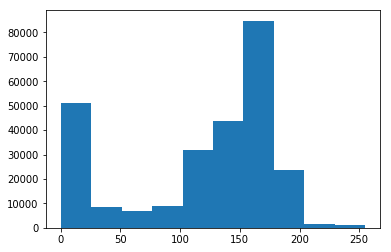

In [0]:
from matplotlib import pyplot as plt
from skimage import data
gray_image = data.camera()
plt.hist(gray_image.ravel())

An image histogram shows the number of pixels at each intensity value (or range of intensity values, if values are binned). Low-intensity values are closer to black, and high-intensity values are closer to white.

Notice that there's a large peak at an intensity of about 10: This peak corresponds with the man's nearly black coat. The peak around the middle of the histogram is due to the predominantly gray tone of the image.

In [0]:
!sudo apt-get install python3-matplotlib python3-numpy python3-pil python3-scipy python3-tk


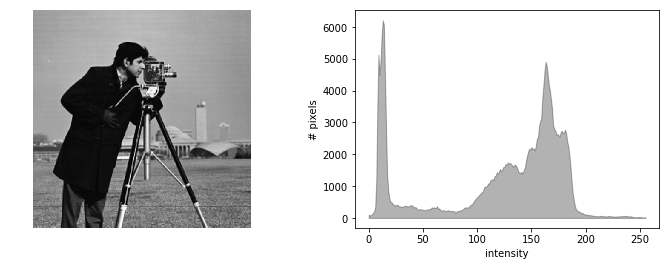

In [0]:
import skdemo
image = data.camera()
skdemo.imshow_with_histogram(image);

Notice the intensity values at the bottom. Since the image has a `dtype` of `uint8`, the values go from 0 to 255. Though you can see some pixels tail off toward 255, you can clearly see in the histogram, and in the image, that we're not using the high-intensity limits very well.

Based on the histogram values, you might want to take all the pixels values that are more than about 180 in the image, and make them pure white (i.e. an intensity of 255). While we're at it, values less than about 10 can be set to pure black (i.e. 0). We can do this easily using `rescale_intensity`, from the `exposure` subpackage.

#### Improving Contrast of an image

Parameters for `rescale_intensity`:
* `in_range`: The min and max intensity values desired in the input image. Values below/above these limits will be clipped.
* `out_range`: The min and max intensity values of the output image. Pixels matching the limits from `in_range` will be rescaled to these limits. Everything in between gets linearly interpolated.

In [0]:
from skimage import exposure
high_contrast = exposure.rescale_intensity(image, in_range=(10, 180))

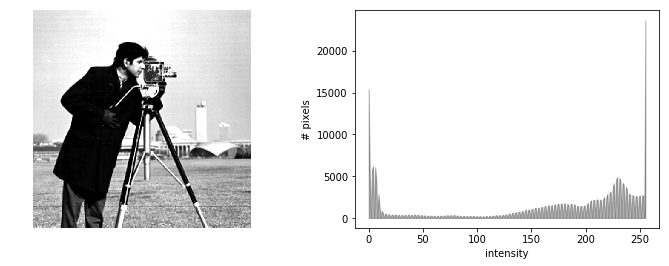

In [0]:
skdemo.imshow_with_histogram(high_contrast);

The contrast is visibly higher in the image, and the histogram is noticeably stretched. The sharp peak on the right is due to all the pixels greater than 180 (in the original image) that were piled into a single bin (i.e. 255).

### Histogram equalization

In the previous example, the grayscale values (10, 180) were set to (0, 255), and everything in between was linearly interpolated. There are other strategies for contrast enhancement that try to be a bit more intelligent---notably histogram equalization.

Let's first look at the cumulative distribution function (CDF) of the image intensities.

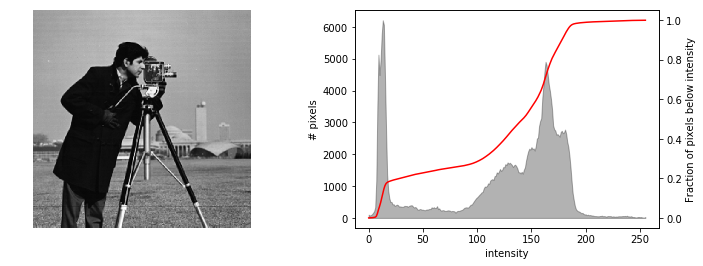

In [0]:
ax_image, ax_hist = skdemo.imshow_with_histogram(image)
skdemo.plot_cdf(image, ax=ax_hist.twinx())

For each intensity value, the CDF gives the fraction of pixels *below* that intensity value.

One measure of contrast is how evenly distributed intensity values are: The dark coat might contrast sharply with the background, but the tight distribution of pixels in the dark coat mean that details in the coat are hidden.

To enhance contrast, we could *spread out intensities* that are tightly distributed and *combine intensities* which are used by only a few pixels.

This redistribution is exactly what histogram equalization does. And the CDF is important because a perfectly uniform distribution gives a CDF that's a straight line. We can use `equalize_hist` from the `exposure` package to produce an equalized image:

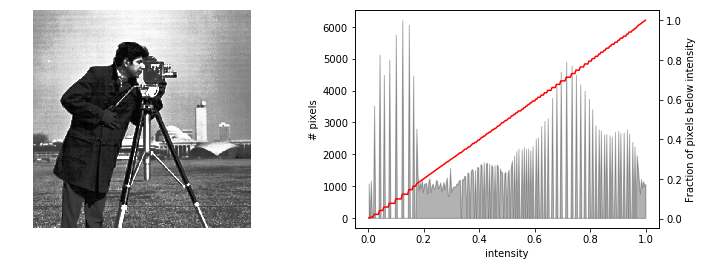

In [0]:
equalized = exposure.equalize_hist(image)
ax_image, ax_hist = skdemo.imshow_with_histogram(equalized)
skdemo.plot_cdf(equalized, ax=ax_hist.twinx())

### Contrasted-limited, adaptive histogram equalization

Unfortunately, histogram equalization tends to give an image whose contrast is artificially high. In addition, better enhancement can be achieved locally by looking at smaller patches of an image, rather than the whole image. In the image above, the contrast in the coat is much improved, but the contrast in the grass is somewhat reduced.

Contrast-limited adaptive histogram equalization (CLAHE) addresses these issues. The implementation details aren't too important, but seeing the result is helpful:

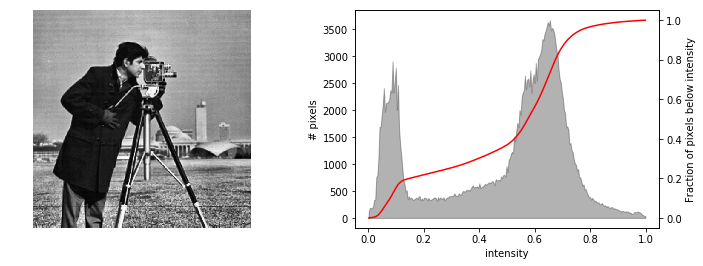

In [0]:
equalized = exposure.equalize_adapthist(image)
ax_image, ax_hist = skdemo.imshow_with_histogram(equalized)
skdemo.plot_cdf(equalized, ax=ax_hist.twinx())

### Thresholding

One of the most common uses for image histograms is thresholding. Let's return to the original image and its histogram

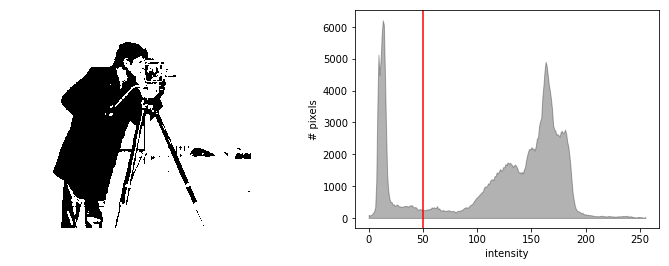

In [0]:
threshold = 50
ax_image, ax_hist = skdemo.imshow_with_histogram(image)
# This is a bit of a hack that plots the thresholded image over the original.
# This just allows us to reuse the layout defined in `plot_image_with_histogram`.
ax_image.imshow(image > threshold)
ax_hist.axvline(threshold, color='red');

87


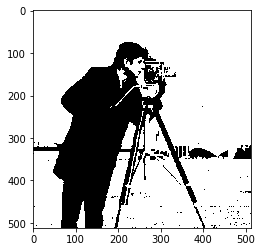

In [0]:
# Rename module so we don't shadow the builtin function
from skimage import filters
#import skimage.filter as filters
threshold = filters.threshold_otsu(image)
print(threshold)
plt.imshow(image > threshold);

## Exercises
Use histogram equalization technique and CLAHE to stretch the contrast of the image 'Image1.png' and report the findings.

For both the techniques, plot the cumulative distribution function and comment on the resulting curve